# Physical cat qubit simulation

Physical Cat Qubit doesn't support a lot of gates, but they are interesting to simulate. The following circuit represents a basic "bit flip" operation, which is equivalent to a NOT gate. 

In [19]:
import pennylane as qml
from pennylane import numpy as np

# Create a device to execute the circuit on
dev = qml.device("alicebob.qubit", alice_backend="EMU:6Q:PHYSICAL_CATS", wires=1)

# Create a quantum circuit and qnode
@qml.qnode(dev)
def circuit():
    qml.PauliX(wires=0)
    return qml.probs()

# Execute the circuit
print(circuit())

Using alice & bob EMU:6Q:PHYSICAL_CATS backend...
[0. 1.]


# Logical cat qubit (Early version)

Logical cat qubit can handle more gates and multiple quantum algorithms can be implemented. It can be interesting to see the noise value and the result to some algorithms.

In [2]:
import pennylane as qml
from pennylane import numpy as np

# Create a device to execute the circuit on
dev = qml.device("alicebob.qubit", alice_backend="EMU:15Q:LOGICAL_EARLY", wires=2)

# Create a quantum circuit and qnode
@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.probs()

# Execute the circuit
print(circuit())

Using alice & bob EMU:15Q:LOGICAL_EARLY backend...
[0.51660156 0.         0.00097656 0.48242188]


## Simple Quantum Algorithm

To test the backend and its noise, we can implement a simple quantum algorithm. The selected algorithm is Grover's algorithm, which is a quantum search algorithm. It is a good choice because it is simple and can be implemented in a few qubits.


Using alice & bob EMU:15Q:LOGICAL_EARLY backend...


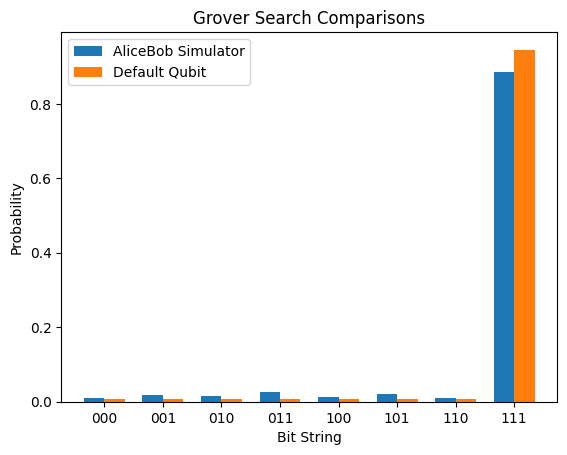

In [20]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# Defining the oracle and the GroverSearch function
n_wires = 3
wires = list(range(n_wires))

def oracle():
    qml.Hadamard(wires[-1])
    qml.Toffoli(wires=wires)
    qml.Hadamard(wires[-1])

def GroverSearch(device, num_iterations=1):
    dev = device
    
    @qml.qnode(dev)
    def circuit():
        for wire in wires:
            qml.Hadamard(wire)

        for _ in range(num_iterations):
            oracle()
            qml.templates.GroverOperator(wires=wires)
        return qml.probs(wires)
    
    return circuit()

# Devices
alice_bob_dev = qml.device("alicebob.qubit", alice_backend="EMU:15Q:LOGICAL_EARLY", wires=3)
default_dev = qml.device("default.qubit", wires=3)

# Getting results from both devices
alicebob_results = GroverSearch(alice_bob_dev, num_iterations=2)
default_results = GroverSearch(default_dev, num_iterations=2)

# Generating bit strings for x-axis labels
bit_strings = [f"{x:0{n_wires}b}" for x in range(2**n_wires)]

# Plotting
fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(len(alicebob_results))

bar1 = ax.bar(index, alicebob_results, bar_width, label='AliceBob Simulator')
bar2 = ax.bar(index + bar_width, default_results, bar_width, label='Default Qubit')

ax.set_xlabel('Bit String')
ax.set_ylabel('Probability')
ax.set_title('Grover Search Comparisons')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(bit_strings)
ax.legend()

plt.show()

Sources : 
- https://pennylane.ai/qml/demos/tutorial_grovers_algorithm/
- https://docs.pennylane.ai/en/stable/code/api/pennylane.GroverOperator.html#pennylane.GroverOperator
